In [1]:
%matplotlib inline
import os
import sys
sys.path.append(os.environ['HOME'] + '/plantcv/lib')
import numpy as np
import cv2
from matplotlib import pyplot as plt
import plantcv as pcv
from plantcv.dev.color_palette import color_palette

In [2]:
# Set variables
device = 0                                    # Workflow step counter
debug = 'plot'                                # Plot debug images to the notebook
rgb_img = 'newpic_low.jpg'                    # Example image

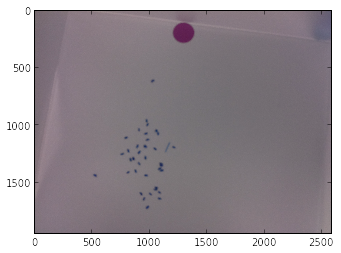

In [3]:
# Read RGB image
img, path, filename = pcv.readimage(rgb_img)
plt.imshow(img)
plt.show()

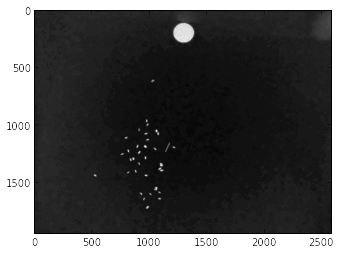

In [4]:
# Convert RGB to HSV and extract the Saturation channel
device, img_gray_sat = pcv.rgb2gray_hsv(img, 's', device, debug)

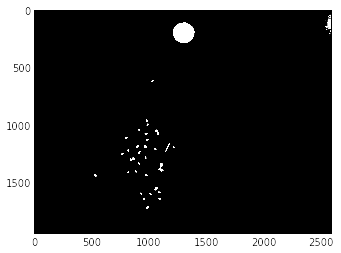

In [5]:
# Threshold the Saturation image
device, img_binary = pcv.binary_threshold(img_gray_sat, 50, 255, 'light', device, debug)

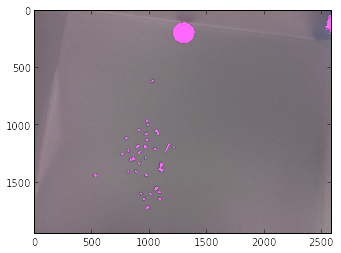

In [6]:
# Identify objects
device, id_objects, obj_hierarchy = pcv.find_objects(img, img_binary, device, debug)

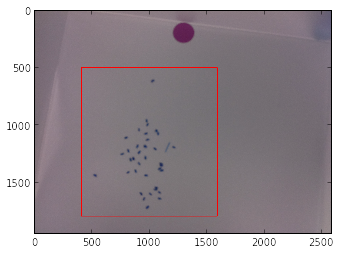

In [7]:
# Define ROI
device, roi, roi_hierarchy = pcv.define_roi(img, 'rectangle', device, None, 'default', debug, True, 
                                             400, 500, -1000, -150)

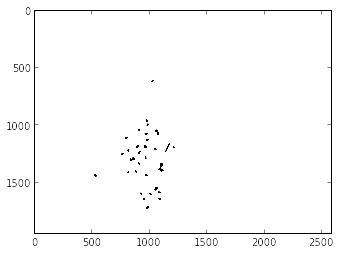

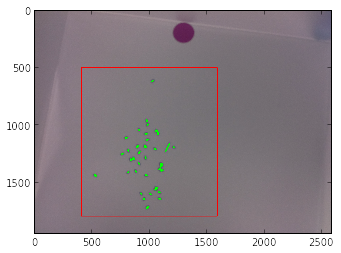

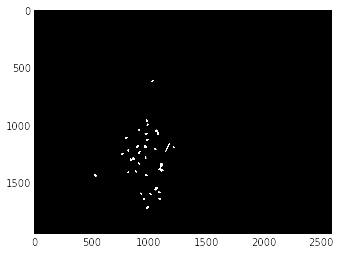

In [8]:
# Decide which objects to keep
device, roi_objects, roi_obj_hierarchy, kept_mask, obj_area = pcv.roi_objects(img, 'partial', roi, roi_hierarchy,
                                                                           id_objects, obj_hierarchy, device,
                                                                           debug)

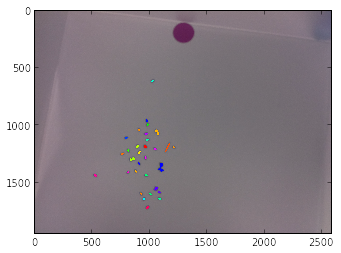

In [9]:
# Randomly color the individual seeds
img_copy = np.copy(img)
for i in range(0, len(roi_objects)):
    rand_color = color_palette(1)
    cv2.drawContours(img_copy, roi_objects, i, rand_color[0], -1, lineType=8, hierarchy=roi_obj_hierarchy)
plt.imshow(img_copy)
plt.show()

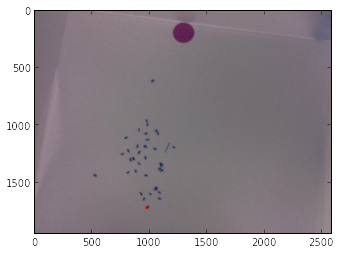

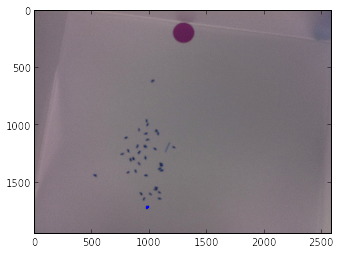

518.0


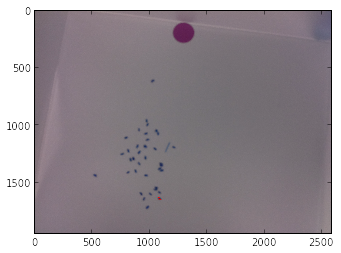

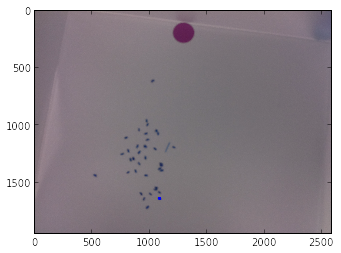

358.0


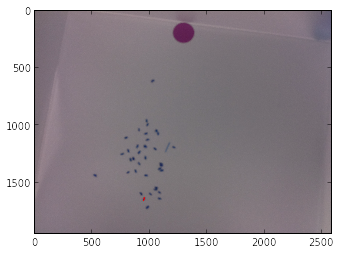

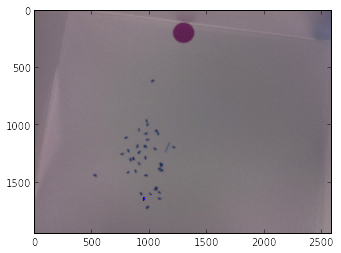

304.0


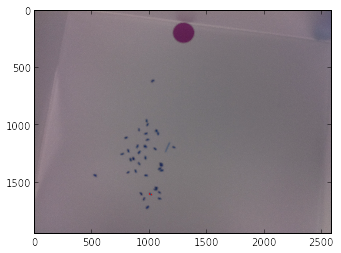

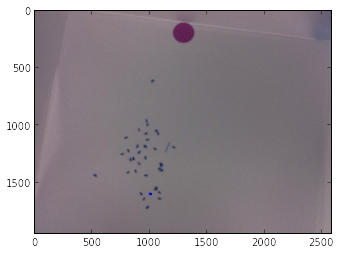

284.0


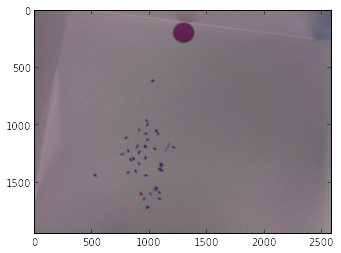

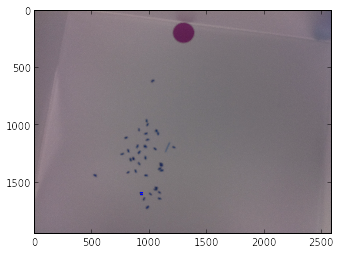

335.0


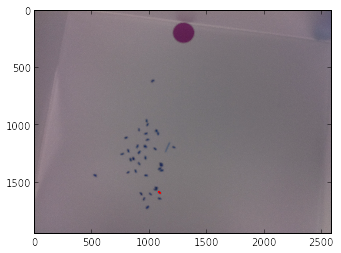

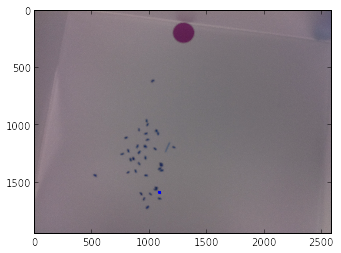

289.0


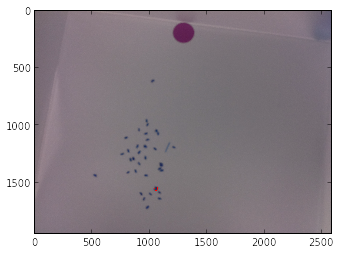

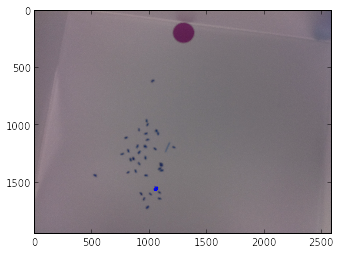

744.0


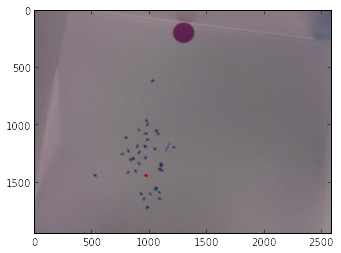

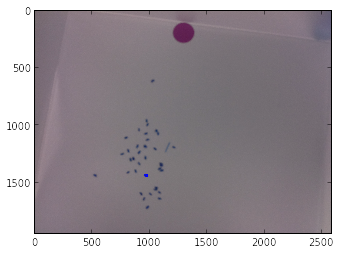

421.0


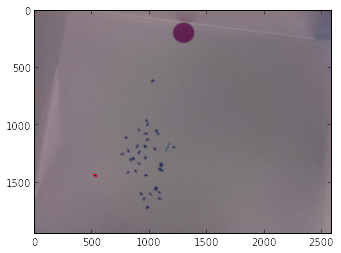

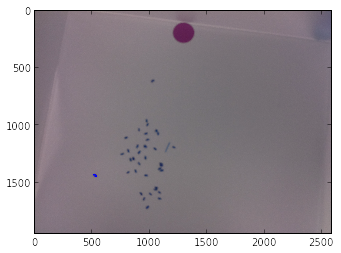

464.0


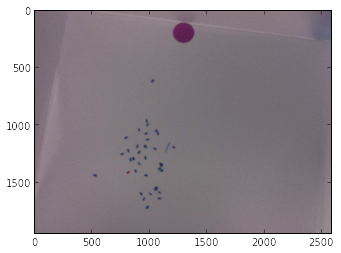

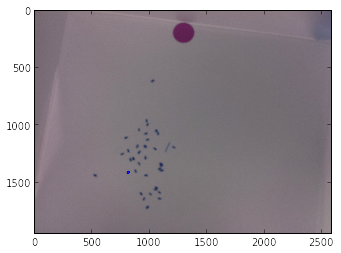

243.0


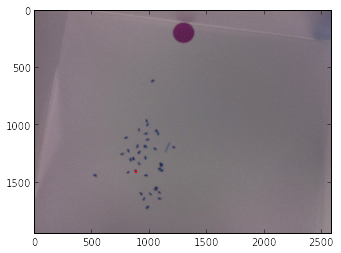

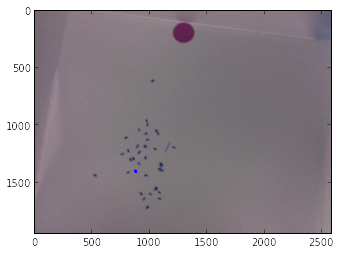

345.0


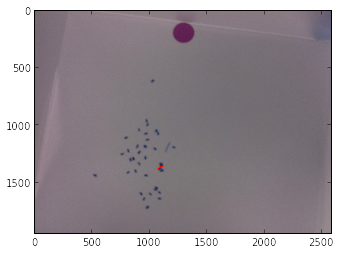

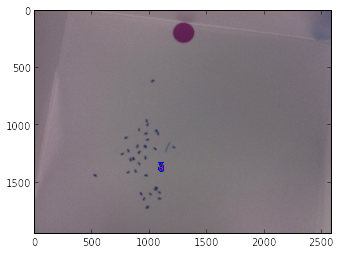

1883.0


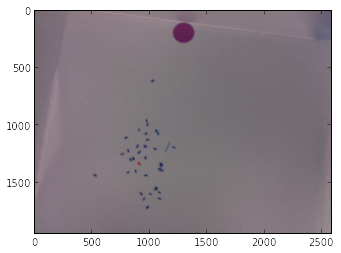

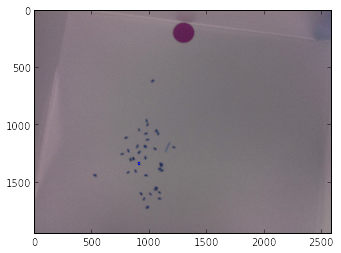

281.0


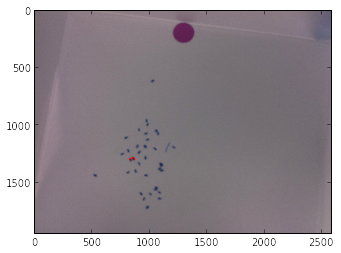

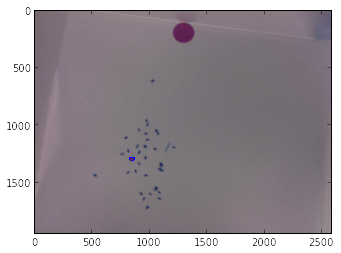

908.0


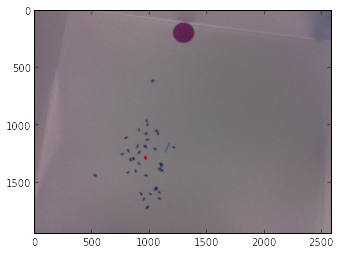

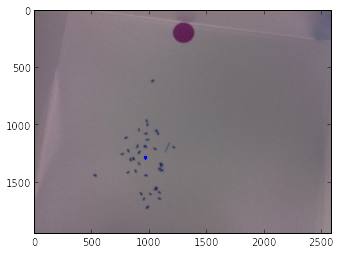

413.0


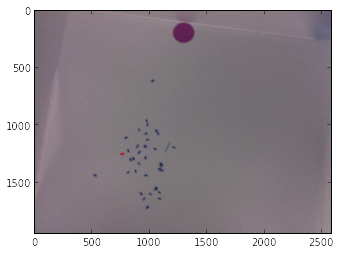

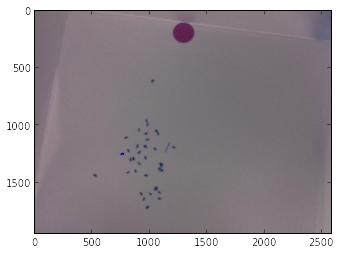

314.0


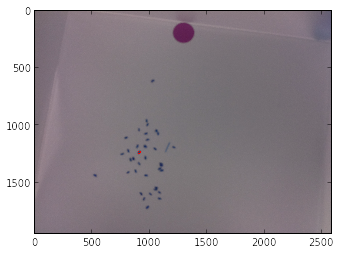

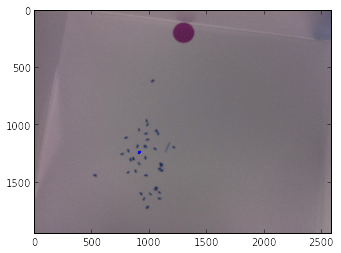

455.0


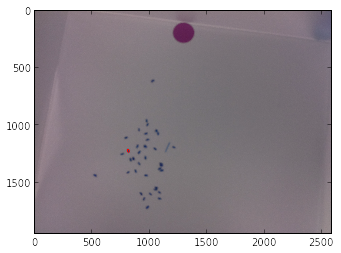

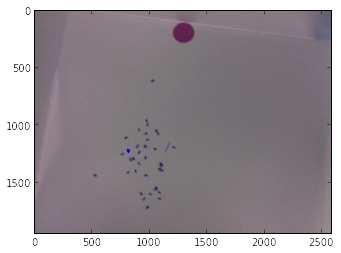

377.0


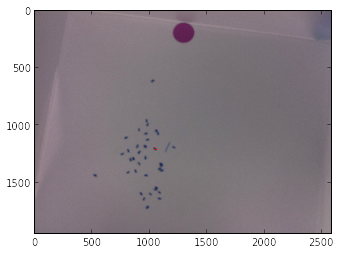

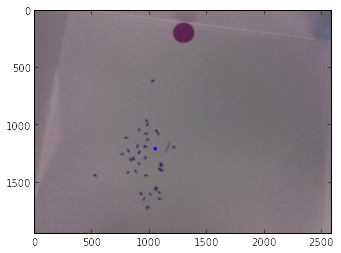

368.0


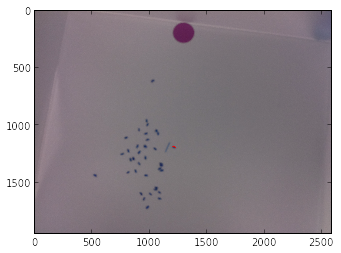

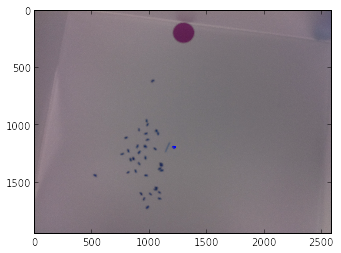

285.0


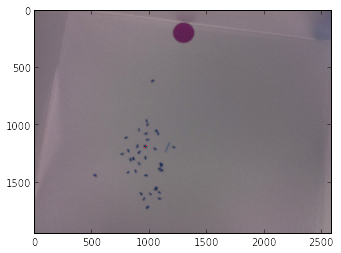

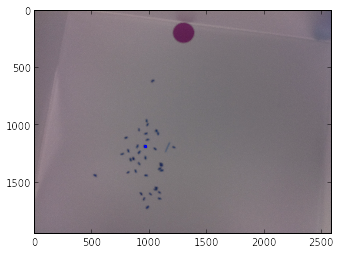

594.0


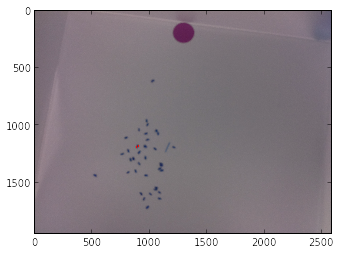

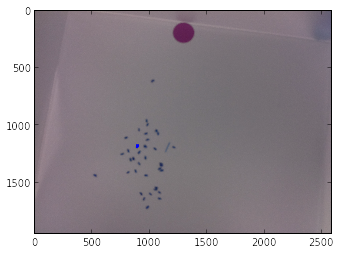

449.0


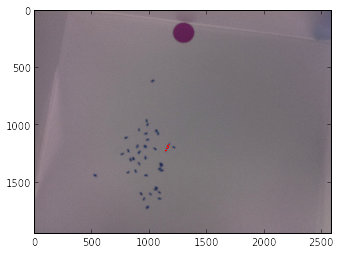

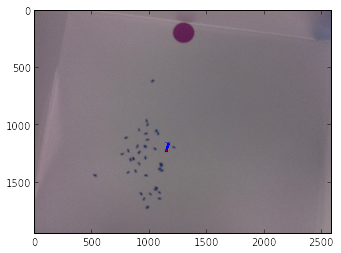

896.0


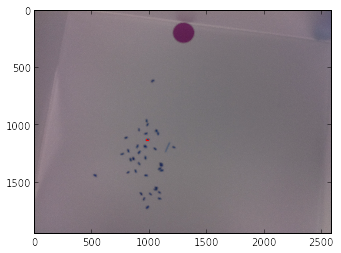

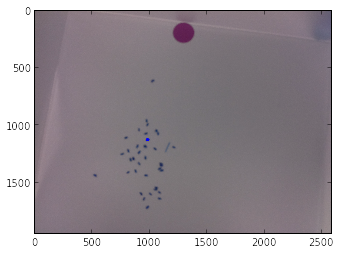

347.0


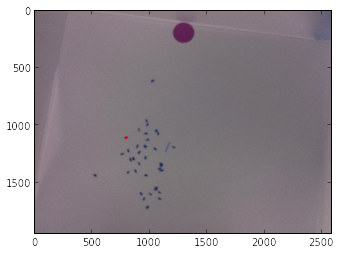

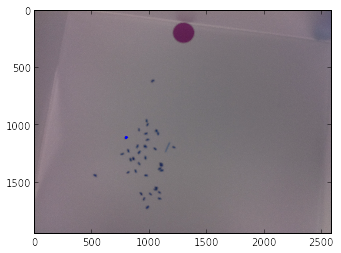

357.0


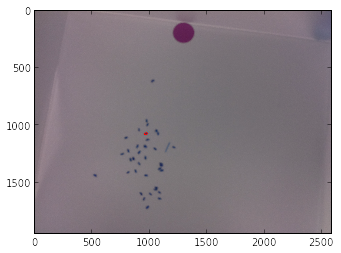

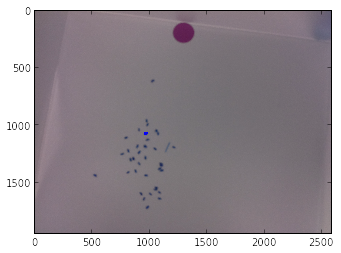

394.0


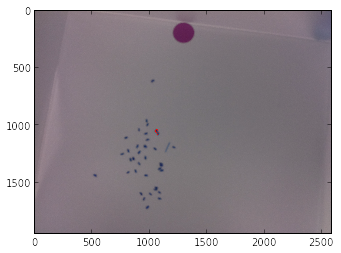

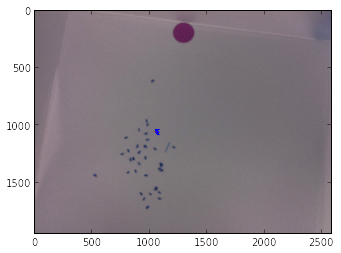

951.0


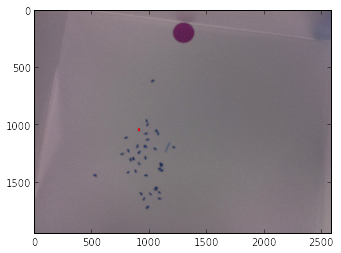

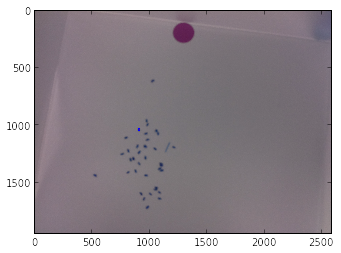

237.0


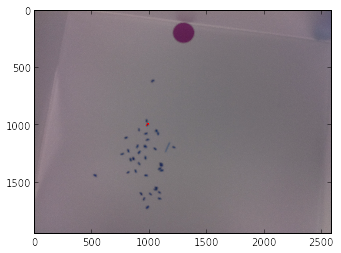

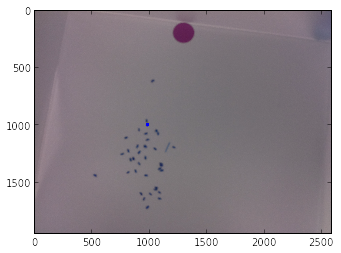

327.0


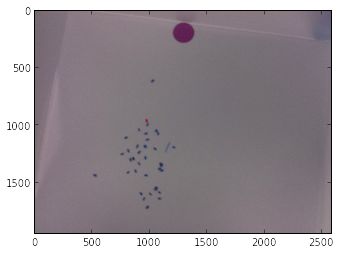

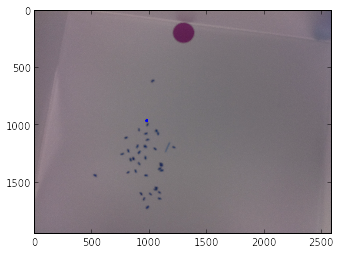

315.0


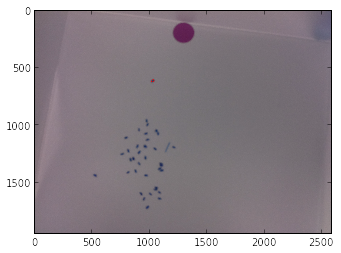

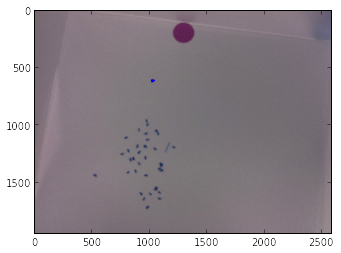

358.0


In [10]:
# Get the area of each seed
shape_header = []
table = []
for i in range(0, len(roi_objects)):
    # Object combine kept objects
    device, obj, mask = pcv.object_composition(img, [roi_objects[i]], np.array([[roi_obj_hierarchy[0][i]]]), 
                                               device, debug)
    if obj is not None:
        device, shape_header, shape_data, shape_img = pcv.analyze_object(img, rgb_img, obj, mask, device, debug)
        table.append(shape_data)
        print(shape_data[1])

In [11]:
# Save results to file
results = open("camelina_seed_plantcv_analysis.txt", 'w')
results.write('\t'.join(map(str, shape_header)) + '\n')
for row in table:
    results.write('\t'.join(map(str, row)) + '\n')
results.close()

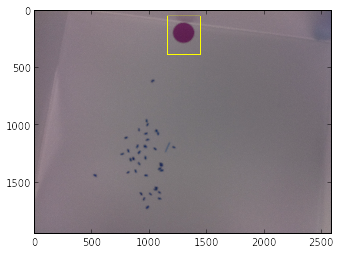

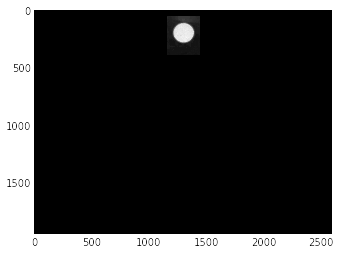

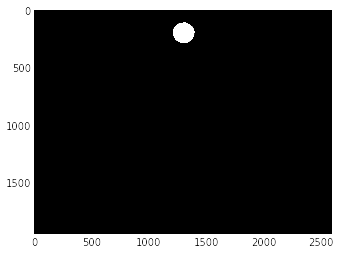

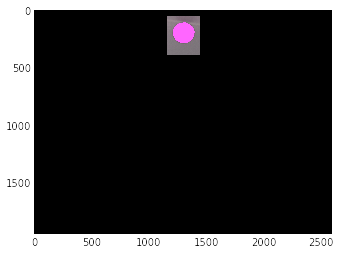

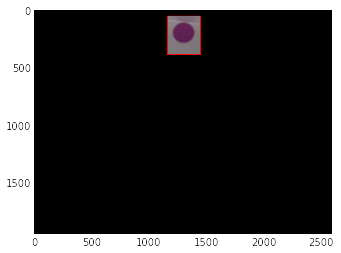

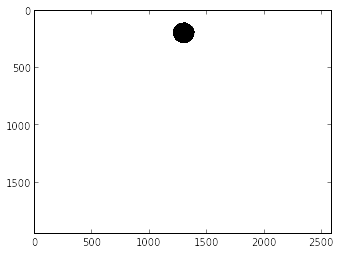

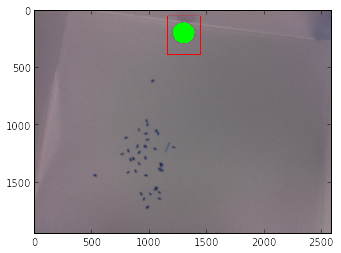

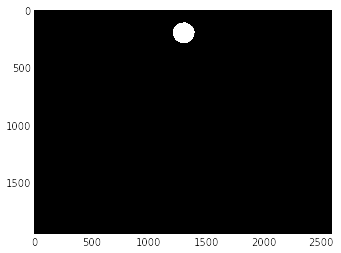

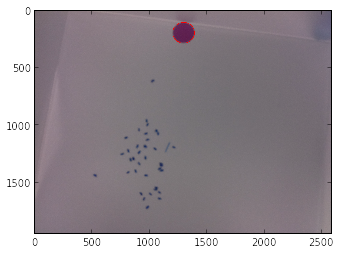

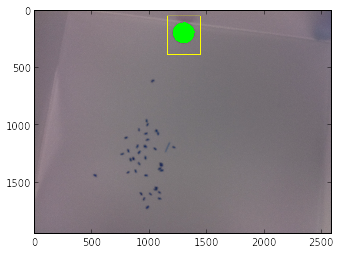

In [12]:
# Find the pixel area of the size standard
device, marker_header, marker_data, analysis_images = pcv.report_size_marker_area(img, 'rectangle', device, debug,
                                                                                  'detect', 1150, 50, -1150, -1550,
                                                                                  'black', 'light', 's', 50)

In [13]:
print(marker_header)
print(marker_data)

('HEADER_MARKER', 'area')
('MARKER_DATA', 26828.0)
